# Titanic - Machine Learning from Disaster Project

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report
import sklearn.model_selection as cv
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# EDA

In [126]:
#read data
train = pd.read_csv('/Users/tsaichichien/BADM Data Science /Assignment_titanic/train.csv')
test =pd.read_csv('/Users/tsaichichien/BADM Data Science /Assignment_titanic/holdout_test.csv')

In [127]:
# train data info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


1. Sex and Embarked to be converted to category or numerical based on library consideration
2. PassengerId and Name column can be dropped
3. Cabin to be dropped as values are less
4. Ticket column also can be dropped
5. Age column will be imputed with median/mean values

In [128]:
# Count Parch and Embarked Value
train['Parch'].value_counts()
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [129]:
train['Embarked']=train['Embarked'].fillna('S')

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

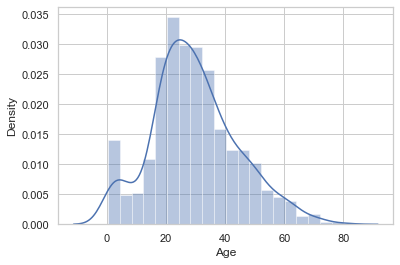

In [130]:
sns.distplot(train[train['Age'].notnull()]['Age'])

In [131]:
train['Age']=train['Age'].interpolate()

In [132]:
train['Age'].describe()

count    891.000000
mean      29.726061
std       13.902353
min        0.420000
25%       21.000000
50%       28.500000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Average passenger age on Titantic is around 30 years old. 

In [133]:
# Drop Cabin duplicate
len(train['Cabin'].drop_duplicates())

148

In [134]:
train = train.drop('Cabin', axis=1)

In [135]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [136]:
train=train.drop(['PassengerId','Name','Ticket'],axis=1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [137]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,22.5,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


<AxesSubplot:xlabel='Pclass', ylabel='count'>

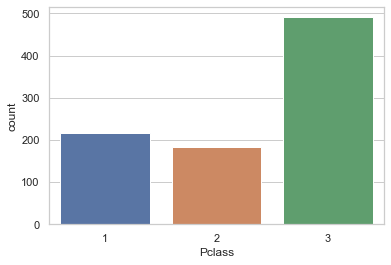

In [138]:
sns.countplot(x='Pclass',data=train)

Most of the passengers were from Third class. 

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


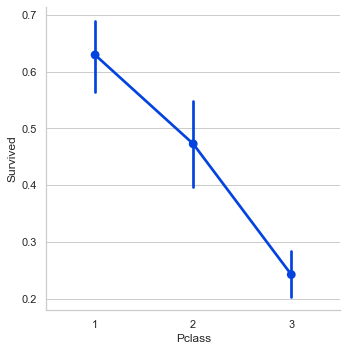

In [139]:
#Surviver based on class
sns.set(style='whitegrid')
g = sns.PairGrid(data=train, x_vars=['Pclass'],y_vars='Survived',size=5)
g.map(sns.pointplot, color=sns.xkcd_rgb['blue'])


Third class passengers survived only around 0.2 precent. On the other hand first class survived 0.63 percent.

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


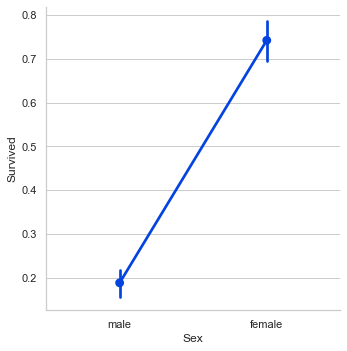

In [140]:
# Surviver based on Sex
sns.set(style='whitegrid')
g = sns.PairGrid(data=train, x_vars=['Sex'],y_vars='Survived',size=5)
g.map(sns.pointplot, color=sns.xkcd_rgb['blue'])


Most of the survivers are femal (80 percent).

In [141]:
#ischild
train['is_child']=train['Age'].apply(lambda x:1 if x <= 15 else 0)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


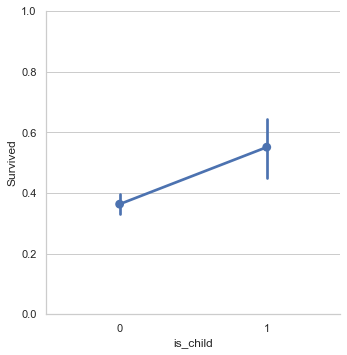

In [142]:
i = sns.PairGrid(data=train, x_vars=['is_child'],y_vars='Survived',size=5)
i.map(sns.pointplot)
i.set(ylim=(0,1))

The percentage of children survive is higher than adult. 

# Data Processing

In [143]:
train['family']=train['SibSp']+train['Parch']
train = train.drop(['SibSp','Parch'],axis=1)

In [144]:
train['is_alone'] = train['family'].apply(lambda x:1 if x==0 else 0)

In [145]:
train['is_female'] = train['Sex'].apply(lambda x:1 if x=='female' else 0)
train = train.drop('Sex', axis=1)
train.head()

,Survived,Pclass,Age,Fare,Embarked,is_child,family,is_alone,is_female
0,0,3,22.0,7.2500,S,0,1,0,0
1,1,1,38.0,71.2833,C,0,1,0,1
2,1,3,26.0,7.9250,S,0,0,1,1
3,1,1,35.0,53.1000,S,0,1,0,1
4,0,3,35.0,8.0500,S,0,0,1,0


In [146]:
train = pd.get_dummies(train, prefix=['is'])

In [147]:
train.head()

,Survived,Pclass,Age,Fare,is_child,family,is_alone,is_female,is_C,is_Q,is_S
0,0,3,22.0,7.2500,0,1,0,0,0,0,1
1,1,1,38.0,71.2833,0,1,0,1,1,0,0
2,1,3,26.0,7.9250,0,0,1,1,0,0,1
3,1,1,35.0,53.1000,0,1,0,1,0,0,1
4,0,3,35.0,8.0500,0,0,1,0,0,0,1


In [148]:
train_x = train.drop(['Survived'], axis=1)
train_y = train['Survived']

In [149]:
train_y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Model Selection

In [150]:
#Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

In [151]:
x,y=train.drop(['Survived'],axis=1),train['Survived']

In [152]:
train_x, test_x, train_y, test_y = train_test_split(x,y, train_size=0.8,test_size=0.2)

In [153]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [154]:
def pfs_first_classifier(model):
    classifier = model()
    classifier.fit(train_x,train_y)
    print(classifier.score(test_x,test_y))
    return classifier

In [155]:
#Decision Tree
acc_SGD = pfs_first_classifier(SGDClassifier)

0.8156424581005587


In [156]:
acc_dt=pfs_first_classifier(DecisionTreeClassifier)

0.7486033519553073


In [157]:
# Logistic Regression
acc_lr=pfs_first_classifier(LogisticRegression)

0.7877094972067039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [158]:
#Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(train_x, train_y)
y_pred_random_forest = clf.predict(test_x)
acc_rf = round(clf.score(test_x,test_y)*100, 2)
print(str(acc_rf)+'percent')

83.8percent


In [159]:
#SVC
svc = SVC(probability = True)
cv_svc = cross_val_score(svc, train_x, train_y, cv=5)
print(cv_svc)
print(cv_svc.mean())

[0.67832168 0.67132867 0.66901408 0.66901408 0.69014085]
0.6755638727469713


In [160]:
clf_rf = RandomForestClassifier()
clf_dt = DecisionTreeClassifier()
clf_lr = LogisticRegression()
clf_svm = SVC()

In [161]:
Classifiers = ['RandomForest','DecisionTree','LogisticRegression','SVC']
scores = []
models = [clf_rf, clf_dt, clf_lr, clf_svm]
for model in models:
    score = cross_val_score(model, train_x, train_y, scoring = 'accuracy', cv = 10, n_jobs = -1).mean()
    scores.append(score)

In [162]:
mode = pd.DataFrame(scores, index = Classifiers, columns = ['score']).sort_values(by = 'score', ascending = False)

In [163]:
mode

,score
LogisticRegression,0.803384
RandomForest,0.794914
DecisionTree,0.779421
SVC,0.678365


 Based on the accuracy result, we can observe the top 2 models are Random Forest and Logistic Regression.

# Fit In Test set

In [164]:
test

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,NaN,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,NaN,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,NaN,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,NaN,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,NaN,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,NaN,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,NaN,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,NaN,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [165]:
testdf = test.drop(['Survived','PassengerId','Name','Ticket','Cabin'], axis=1)
testdf

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [166]:
testdf['Age']=testdf['Age'].interpolate()

In [167]:
testdf['is_child']=testdf['Age'].apply(lambda x:1 if x <= 15 else 0)

In [168]:
testdf['family']=testdf['SibSp']+testdf['Parch']
testdf = testdf.drop(['SibSp','Parch'],axis=1)

In [169]:
testdf['is_alone'] = testdf['family'].apply(lambda x:1 if x==0 else 0)

In [170]:
testdf['is_female'] = testdf['Sex'].apply(lambda x:1 if x=='female' else 0)
testdf= testdf.drop('Sex', axis=1)

In [171]:
testdf = pd.get_dummies(testdf, prefix=['is'])

In [172]:
X_testset=testdf
X_testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     418 non-null    int64  
 1   Age        418 non-null    float64
 2   Fare       417 non-null    float64
 3   is_child   418 non-null    int64  
 4   family     418 non-null    int64  
 5   is_alone   418 non-null    int64  
 6   is_female  418 non-null    int64  
 7   is_C       418 non-null    uint8  
 8   is_Q       418 non-null    uint8  
 9   is_S       418 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 24.2 KB


In [173]:
# testdf
testdf['Fare']=testdf['Fare'].fillna(testdf['Fare'].mean())

In [174]:
clf = LogisticRegression()
clf.fit(train_x,train_y)
y_pred_lr = clf.predict(X_testset)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [175]:
test =pd.read_csv('/Users/tsaichichien/BADM Data Science /Assignment_titanic/holdout_test.csv')
predict = pd.DataFrame({
         "PassengerId":test['PassengerId'],
         "Survived":y_pred_lr
})

In [176]:
predict.to_csv('Titanic Results from cctsai5.csv',index=False)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Based on the model selection, I present the prediction result of Logistic Regression model since the accuray is higher than SVC.